In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.ticker as ticker
import numpy as np
import datetime 


In [370]:
cwd = os.getcwd()
raw_dir = cwd + "/../Datos/raw/"
processed_dir = cwd + "/../Datos/processed/"
final_dir = cwd + "/../Datos/final/"
graphs_dir = cwd + "/../graphs/"

In [371]:
df_unificado = pd.read_csv(processed_dir + 'datos_limpios_unidos.csv', parse_dates=['fecha_trans'])

In [372]:
df_unificado

,cod_trans,cod_rest,fecha_trans,valor_trans,latitud,longitud,canal,medio,nom_rest,latitud_rest,longitud_rest,comision
0,CO-Rappi-274572835,45,2022-09-10,23800,3.419646,-76.539767,rappi,Rappi,PALMETTO PLAZA,3.419646,-76.539767,3451.0
1,CO-DiDi-5764618254974781692-5,45,2022-09-10,22900,3.419646,-76.539767,didi,didi,PALMETTO PLAZA,3.419646,-76.539767,3206.0
2,CO-Rappi-274584964,45,2022-09-10,53900,3.419646,-76.539767,rappi,Rappi,PALMETTO PLAZA,3.419646,-76.539767,7815.5
3,CO-Rappi-274589935,45,2022-09-10,15900,3.419646,-76.539767,rappi,Rappi,PALMETTO PLAZA,3.419646,-76.539767,2305.5
4,CO-Rappi-274610931,45,2022-09-10,63900,3.419646,-76.539767,rappi,Rappi,PALMETTO PLAZA,3.419646,-76.539767,9265.5
...,...,...,...,...,...,...,...,...,...,...,...,...
274235,CO-DiDi-5764623304916796070-8,187,2023-04-29,61000,3.396714,-76.509745,didi,didi,CIUDAD CORDOBA,3.396714,-76.509745,8540.0
274236,CO-Rappi-343403433,187,2023-04-29,18900,3.396714,-76.509745,rappi,Rappi,CIUDAD CORDOBA,3.396714,-76.509745,2740.5
274237,CO-DiDi-5764623404791562958-23,187,2023-04-29,39800,3.396714,-76.509745,didi,didi,CIUDAD CORDOBA,3.396714,-76.509745,5572.0
274238,CO-DiDi-5764623427134620385-24,187,2023-04-29,43800,3.396714,-76.509745,didi,didi,CIUDAD CORDOBA,3.396714,-76.509745,6132.0


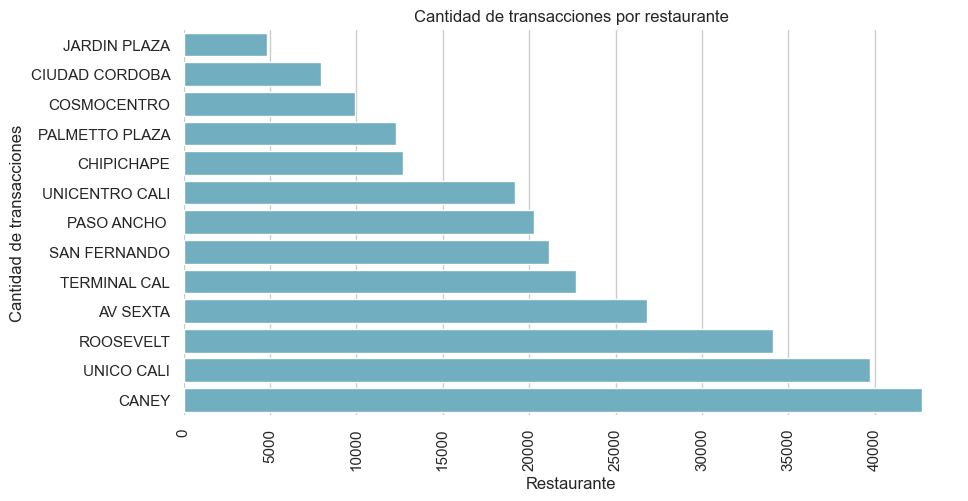

In [373]:

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10,5))
# Calcular la cantidad de transacciones por restaurante
transacciones_por_restaurante = df_unificado['nom_rest'].value_counts(ascending=True)

sns.color_palette("muted")
# Crear el gráfico de barras utilizando Seaborn
sns.barplot( x=transacciones_por_restaurante.values,y=transacciones_por_restaurante.index, color='c')

ax.set( ylabel='Cantidad de transacciones',
       xlabel='Restaurante')
# Personalizar el gráfico
plt.xticks(rotation='vertical')
plt.title('Cantidad de transacciones por restaurante')
sns.despine(left=True, bottom=True)
# Mostrar el gráfico
sns.despine(left=True, bottom=True)


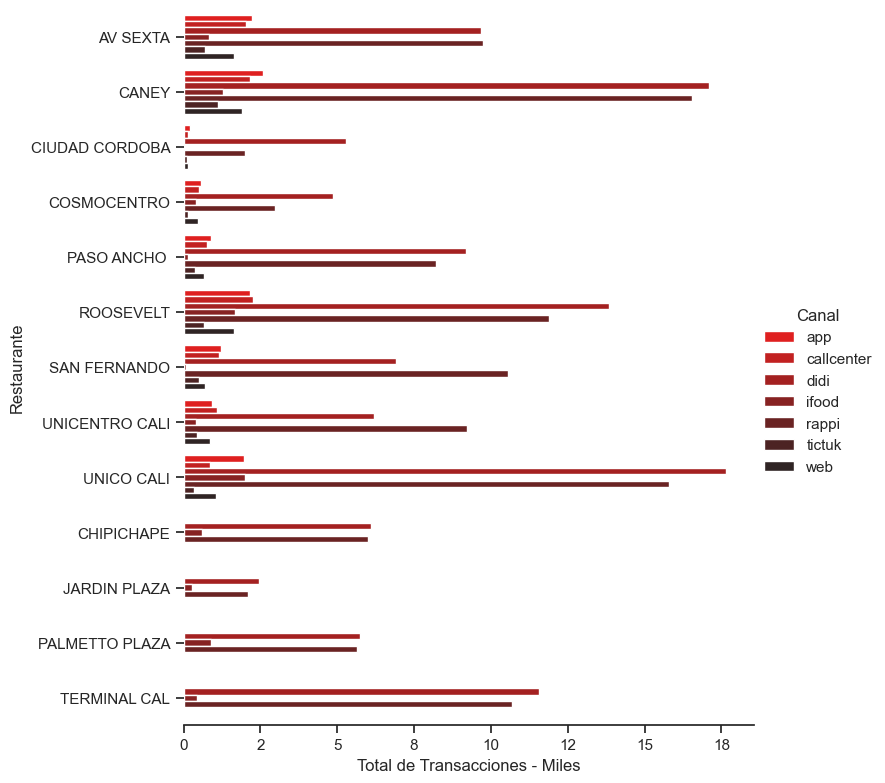

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo del gráfico
sns.set_theme(style="ticks")

# Agrupar por canal y restaurante y calcular el total de transacciones
total_transacciones = df_unificado.groupby(['canal', 'nom_rest'])['cod_trans'].count().reset_index()

# Crear el gráfico de barras apiladas
g = sns.catplot(
    data=total_transacciones, kind="bar",
    y="nom_rest", x="cod_trans", hue="canal",
    palette="dark:red_r", height=8
)


# Personalizar el gráfico
g.despine(left=True)
g.set_axis_labels("Total de Transacciones - Miles", "Restaurante")
g.legend.set_title("Canal")

# Obtener el objeto de los ejes del gráfico
ax = g.ax

# Formatear el eje x en miles
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}'))

# Resaltar las barras más grandes haciendo que sean más gruesas
max_value = total_transacciones['cod_trans'].max()
for bar in ax.patches:
    height = bar.get_height()
    if height == max_value:
        bar.set_linewidth(2)  # Ancho de línea de las barras más grandes
    else:
        bar.set_linewidth(1)  # Ancho de línea de las demás barras

# Mostrar el gráfico
plt.show()


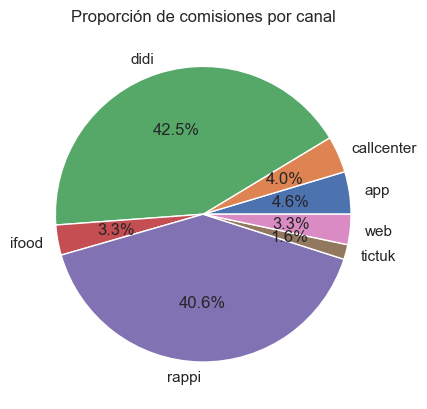

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la suma de las comisiones por canal
comisiones_por_canal = df_unificado.groupby('canal')['valor_trans'].count()

# Crear el gráfico de pastel utilizando Seaborn
plt.pie(comisiones_por_canal.values, labels=comisiones_por_canal.index, autopct='%1.1f%%')

# Personalizar el gráfico
plt.title('Proporción de comisiones por canal')

# Mostrar el gráfico
plt.show()


<Axes: >

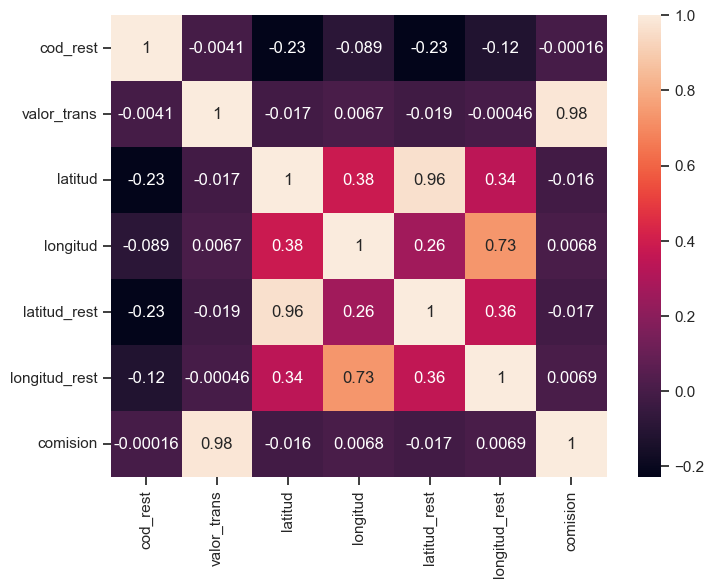

In [376]:
# GRafico de Correlación que permite establecer relación entre las variables númericas del sistema
numeric_data = df_unificado.select_dtypes(include=[np.number])  # Select only numeric columns

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True)

In [377]:
df_unificado.head(100)

,cod_trans,cod_rest,fecha_trans,valor_trans,latitud,longitud,canal,medio,nom_rest,latitud_rest,longitud_rest,comision
0,CO-Rappi-274572835,45,2022-09-10,23800,3.419646,-76.539767,rappi,Rappi,PALMETTO PLAZA,3.419646,-76.539767,3451.0
1,CO-DiDi-5764618254974781692-5,45,2022-09-10,22900,3.419646,-76.539767,didi,didi,PALMETTO PLAZA,3.419646,-76.539767,3206.0
2,CO-Rappi-274584964,45,2022-09-10,53900,3.419646,-76.539767,rappi,Rappi,PALMETTO PLAZA,3.419646,-76.539767,7815.5
3,CO-Rappi-274589935,45,2022-09-10,15900,3.419646,-76.539767,rappi,Rappi,PALMETTO PLAZA,3.419646,-76.539767,2305.5
4,CO-Rappi-274610931,45,2022-09-10,63900,3.419646,-76.539767,rappi,Rappi,PALMETTO PLAZA,3.419646,-76.539767,9265.5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,CO-ifood-09111515434636477,45,2022-09-11,26800,3.419646,-76.539767,ifood,LOGISTIC,PALMETTO PLAZA,3.419646,-76.539767,3484.0
96,CO-DiDi-5764618515206179504-19,45,2022-09-11,32800,3.419646,-76.539767,didi,didi,PALMETTO PLAZA,3.419646,-76.539767,4592.0
97,CO-DiDi-5764618433442417342-21,45,2022-09-11,50800,3.419646,-76.539767,didi,didi,PALMETTO PLAZA,3.419646,-76.539767,7112.0
98,CO-Rappi-275043652,45,2022-09-11,22800,3.419646,-76.539767,rappi,Rappi,PALMETTO PLAZA,3.419646,-76.539767,3306.0


# 3. Preparación de los Datos para el Algortimo de Entrenamiento.


In [378]:
# Función que permite crear las columnas de dia,mes,año
def funcion_fecha(x):
    año = x.year
    mes = x.month
    dia = x.day
    return datetime.datetime(año, mes, dia)

df_unificado['fecha_trans'] = df_unificado['fecha_trans'].apply(lambda x: funcion_fecha(x))


AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [ ]:
df_unificado['mes'] = df_unificado['fecha_trans'].apply(lambda x: x.month)
df_unificado['anio'] = df_unificado['fecha_trans'].apply(lambda x: x.year)
df_unificado['dia'] = df_unificado['fecha_trans'].apply(lambda x: x.day)
df_unificado['dia_semana'] = df_unificado['fecha_trans'].apply(lambda x: x.weekday())
df_unificado = df_unificado.drop(columns ='fecha_trans')
df_unificado

In [ ]:
# Se realiza una copia del Dataframe Actual y se traslada al
# Data Frame df_dummy el cual almacenara los cambios de codificación.
df_dummy = df_unificado.copy()
df_dummy.head()

In [ ]:
def dummies(df_dummy):
    
  df_dummy = pd.get_dummies(df_dummy, columns=['cod_rest'])
  df_dummy = pd.get_dummies(df_dummy, columns=['canal'])
  df_dummy = pd.get_dummies(df_dummy, columns=['medio'])
  df_dummy = pd.get_dummies(df_dummy, columns=['nom_rest'])    
  return df_dummy

In [ ]:
#Eliminamos columna que no son necesarias para el modelo de prediccion.
df_dummy = df_dummy.drop(columns ='cod_trans')


In [ ]:
df_dummy.info()

In [ ]:
# Se procede a aplicar la función al Dataframe para aplicar los cambios de codificación.
df_dummy = dummies(df_dummy)

In [ ]:
df_dummy.head()

In [ ]:
# Se crea el DataFrame para el modelo.
df_modelo = df_dummy.copy()

df_modelo


# 4. Entrenamiento y Predicción.

## 4.1 Preparando Datos para el Entrenamiento.
___
Del nuevo Data Frame separamos las variables: La variable independiente 'x' y la variable dependiente 'y' que vamos a proceder a predecir.

In [380]:
# Se separa las variables independientes, X contendra el DF, mientras "y" sera la columna valor_trans
X = df_modelo.drop('valor_trans', axis=1).copy()
y = df_modelo['valor_trans']

___
Se Crean las variables para el entrenamiento y Testeo.

In [381]:
# Se procede a asignar a las variables de entrenamiento los valores almacenados en las variables X,y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [382]:
# Prueba del valor que contienen las Variables en este caso y_test
y_test

27067     31100
37990     17000
96180     53900
98124     35800
51205     19900
          ...  
35549     51000
2722      23800
70412     54800
40213     55200
143996    43600
Name: valor_trans, Length: 82272, dtype: int64

In [383]:
# Observemos que la variable de entrenamiento contiene más datos que la de y_test, que corresponde al 30% del df Original
y_train

3482      53900
8741      85500
137602    34400
196350    53900
35218     22100
          ...  
270360    47900
207497    27500
215033    27700
35367     41900
184693    16800
Name: valor_trans, Length: 191968, dtype: int64

In [384]:
    # Validamos que la variable de X_test contenga los datos de las columnas del DF exceptuando valor_trans(y_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82272 entries, 27067 to 143996
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   latitud                  82272 non-null  float64
 1   longitud                 82272 non-null  float64
 2   latitud_rest             82272 non-null  float64
 3   longitud_rest            82272 non-null  float64
 4   comision                 82272 non-null  float64
 5   mes                      82272 non-null  int64  
 6   anio                     82272 non-null  int64  
 7   dia                      82272 non-null  int64  
 8   dia_semana               82272 non-null  int64  
 9   cod_rest_26              82272 non-null  bool   
 10  cod_rest_27              82272 non-null  bool   
 11  cod_rest_37              82272 non-null  bool   
 12  cod_rest_45              82272 non-null  bool   
 13  cod_rest_60              82272 non-null  bool   
 14  cod_rest_61           

## 4.2 Modelos de Entrenamiento.
___
Consideraciones: 

*MODELOS:* Se hara uso de las librerias de sklearn y de ella se importaran los modelos de entrenamiento, al igual que las metricas y score requeridos.

In [385]:
# Se Importan las librerias necesarias para el entrenamiento.
from scipy.stats import norm
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

### 4.2.1 Algoritmo: RandomForestRegressor.
___

Un bosque aleatorio es un metaestimador que ajusta una serie de árboles de decisión de clasificación en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

In [386]:
%matplotlib inline

In [387]:
# Primero se instancia la clase 'DecisionForestRegressor' a trabajar o método 'fit'
rf = RandomForestRegressor (n_estimators=1000, random_state=42)
rf.fit(X_train, y_train) 

KeyboardInterrupt: 

#### Evaluando el Modelo

In [ ]:
# Para realizar el conjunto de predicciones sobre X_test se utiliza el método 'predict'
y_pred_RFR = rf.predict(X_test)

In [ ]:
# Calculando el Coeficiente de Determinación del Modelo.
score_RFR = r2_score(y_test,y_pred_RFR)

In [ ]:
# Validando el módelo a través de 'metrics'.
print ('Error Medio Absoluto:', metrics.mean_absolute_error(y_test, y_pred_RFR))
print ('Error Quadrático Medio:', metrics.mean_squared_error(y_test, y_pred_RFR))
print ('Raiz de Error Quadrático Medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RFR)))
print ('Coeficiente de Determinación:', score_RFR)

### 4.2.2 Algoritmo: LinearRegression.
___

LinearRegression ajusta un modelo lineal con coeficientes w = (w1, …, wp) para minimizar la suma residual de cuadrados entre los objetivos observados en el conjunto de datos y los objetivos predichos por la aproximación lineal.

In [388]:
# Se utiliza el algoritmo de Regresion lineal y se almacena en la variable reg para el entrenamiento.
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [389]:
# Creamos la variable de predicción que almacenara los resultados.
y_pred_LR=LinReg.predict(X_test)
score_LR= r2_score(y_test,y_pred_LR)

In [390]:
# Se imprime el coeficiente de determinación del modelo.
print ('Coeficiente de Determinación:', score_LR)

Coeficiente de Determinación: 0.9491090057252112


### 4.2.3 Algoritmo: DecisionTreeRegressor.
___

Los árboles de decisión (DT) son un método de aprendizaje supervisado no paramétrico que se utiliza para la clasificación y la regresión . El objetivo es crear un modelo que prediga el valor de una variable de destino mediante el aprendizaje de reglas de decisión simples deducidas de las características de los datos. Un árbol puede verse como una aproximación constante por partes.

In [391]:
# Se utiliza el modelo de Arbol de decisión de Regresión asignado a la variable model_DTR
# min_samples_leaf, indica el número mínimo de muestras requeridas para estar en un nodo de hoja.
model_DTR=DecisionTreeRegressor(min_samples_leaf=.01)
model_DTR.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=0.01)

#### Evaluando el modelo.

In [392]:
y_pred_DTR=model_DTR.predict(X_test)
score_DTR= r2_score(y_test,y_pred_DTR)

In [393]:
# Se imprime el coeficiente de determinación del modelo.
print ('Coeficiente de Determinación:', score_DTR)

Coeficiente de Determinación: 0.6142332105928799


### 4.2.4 Ajuste de Hiper Parametros.
___
GridSearchCV implementa un método de "ajuste" y "puntuación". También implementa “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” y “inverse_transform” si están implementados en el estimador utilizado.
Los parámetros del estimador utilizados para aplicar estos métodos se optimizan mediante una búsqueda de cuadrícula con validación cruzada sobre una cuadrícula de parámetros.

In [394]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [395]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [37]:
tuning_model=GridSearchCV(model_DTR,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [38]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [48]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [49]:
# best model score
tuning_model.best_score_

-994983512.8973824

#### Training Decision Tree con los Mejores Hiper Parámetros.

In [50]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=3,min_weight_fraction_leaf=0.1,splitter='random')

In [51]:

tuned_hyper_model = DecisionTreeRegressor(max_features=None)  # Usar todas las características
tuned_hyper_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [52]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)
score_tuned= r2_score(y_test,tuned_pred)

In [53]:
# Se imprime el coeficiente de determinación del modelo.
print ('Coeficiente de Determinación:', score_tuned)

Coeficiente de Determinación: 0.8195330277201702


# resultados
___________

El modelo que mejor se adapta a los datos de estudio de ventas es el **DECISION TREE REGRESOR**.

Comparacion en **Coeficiente de Determinación** de los algoritmos:

|        ALGORITMO               |   RESULTADO   |
|--------------------------------|---------------|
| RANDOM FOREST REGRESSOR        |     80 %      |
| LINEAR REGRESSION              |     97 %      |
| DECISION TREE REGRESOR         |     16 %      | 
| HIPER PARAMETROS               |     81 %      |

# 5. Predicción de Resultados basados en el algoritmo
______
Una vez seleccionado el mejor model "*LINEAR REGRESSION*", se procedera a predecir el futuro de los datos. Para ello se deberá crear un DataFrame con los valores que se desean predecir.

Para ello se carga un archivo de test con las ventas de los 3 meses posteriores al data origninal. Se procede a codificar el data y se pasara por el modelo seleccionado de entrenamiento.

## 5.1 Construcción del Data Frame para Predicción
___
Se generara un DataFrame con la simulacion de ventas del mes de Agosto- Diciembre de 2023, con un promedio de ventas diarias de 65. Así mismo, se utilizará como base los datos contenidos en el Data Frame de trabajo original.

In [730]:
# LIBRERIAS REQUERIDAS
import warnings
warnings.filterwarnings("ignore")
import random
from datetime import datetime, timedelta

In [731]:
df_final = pd.DataFrame(columns=['fecha_trans','cod_rest','nom_rest','canal','medio','comision''latitud','latitud_rest','longitud_rest','longitud','comision'])    
df_final['fecha_trans'] = pd.to_datetime(df_final['fecha_trans'])
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha_trans      0 non-null      datetime64[ns]
 1   cod_rest         0 non-null      object        
 2   nom_rest         0 non-null      object        
 3   canal            0 non-null      object        
 4   medio            0 non-null      object        
 5   comisionlatitud  0 non-null      object        
 6   latitud_rest     0 non-null      object        
 7   longitud_rest    0 non-null      object        
 8   longitud         0 non-null      object        
 9   comision         0 non-null      object        
dtypes: datetime64[ns](1), object(9)
memory usage: 124.0+ bytes


In [732]:
### DATAFRAME con Las Ciudades con mayor Cantidad de Ventas

# Se crea una Lista con las 50 ciudades(incluyendo Departamento) con mayor cantidad de ventas.
df_list_rest = df_unificado.groupby(['nom_rest','cod_rest','latitud_rest','longitud_rest'], as_index=False)[['valor_trans']].count().sort_values(by='valor_trans', ascending=False)

# Obtenemos las Primeras cincuenta filas que corresponden a las ciudades con más cantidad de ventas.
df_list_rest_df = df_list_rest.iloc[:, 0:4]

# Pasamos las columnas del DataFrame a una Matriz por el metodo to_numpy.
lista_rest = df_list_rest_df.to_numpy()
comision=0
# Lista de los dispositivos
lista_canal = df_unificado['canal'].unique().tolist()

rappi = ['Rappi']
didi = ['didi']
ifood = ['MARKETIFOOD','LOGISTIC','MARKETPLACE','Marketifood']
app = ['Ios','Android']
callcenter = ['CallCenter']
web = ['Web']
tictuk = ['TICTUK']


# Se crea una Lista con las 50 ciudades(incluyendo Departamento) con mayor cantidad de ventas.
df_list_rest = df_unificado.groupby(['nom_rest','cod_rest'], as_index=False)[['valor_trans']].count().sort_values(by='valor_trans', ascending=False)


In [733]:
#arrays para almacenar datos segun se requiera.
fecha_tot = []
rest_aleat1 = []
rest_aleat2 = []
lact_aleat = []
long_aleat = []
canal_aleat = []
medio_aleat = []

In [734]:
# Supongamos que tu DataFrame se llama 'df'
promedio_ventas_por_dia = df_unificado.groupby('fecha_trans')['valor_trans'].count()

inicio_2022 = datetime(2022, 5, 1)
fin_2022 = datetime(2022, 8, 30)
dias_totales_2022 = (fin_2022 - inicio_2022).days + 1

inicio_2023 = datetime(2023, 5, 1)
fin_2023 = datetime(2023, 8, 30)
dias_totales_2023 = (fin_2023 - inicio_2023).days + 1

# Filtrar los datos para el período de interés
df_periodo = df_unificado[(df_unificado['fecha_trans'] >= inicio_2022) & (df_unificado['fecha_trans'] <= fin_2022)]

for d in range(dias_totales_2023):
    fecha_dia_2023 = (inicio_2023 + timedelta(days=d)).strftime("%Y-%m-%d")
    
    # Calcular la diferencia de días entre 2023 y 2022
    dias_diferencia = (d * dias_totales_2022) // dias_totales_2023
    
    # Restar la diferencia de días para obtener la fecha correspondiente en 2022
    fecha_dia_2022 = (inicio_2022 + timedelta(days=dias_diferencia)).strftime("%Y-%m-%d")
    
    promedio_por_fecha = promedio_ventas_por_dia.get(fecha_dia_2022, 0)  # Obtener el promedio por fecha en 2022
    fecha_tot.extend([fecha_dia_2023] * int(promedio_por_fecha))


In [735]:
# Nos Permite Validar La cantidad de registros que se crearan para el DataFrame 
TotFilas = len(fecha_tot)

In [736]:
#generamos resaurantes, codigo y ubicacion
total_restaurantes = sum(restaurante[1] for restaurante in lista_rest)
porcentajes_ = df_unificado['nom_rest'].value_counts(normalize=True) * 100


# Calcular los porcentajes para cada restaurante
porcentajes_restaurante = [(restaurante[0], porcentajes_.get(restaurante[0], 0), restaurante[1], restaurante[2], restaurante[3]) for restaurante in lista_rest]
# Realizar selecciones aleatorias basadas en los porcentajes
restaurantes_seleccionados = []
for _ in range(TotFilas):
    restaurante_aleatorio = random.choices(porcentajes_restaurante, weights=[p for _, p, _, _, _ in porcentajes_restaurante])[0]
    rest_aleat1.append(restaurante_aleatorio[0])
    rest_aleat2.append(restaurante_aleatorio[2])
    lact_aleat.append(restaurante_aleatorio[3])
    long_aleat.append(restaurante_aleatorio[4])


In [737]:
porcentajes_

nom_rest
CANEY             15.574314
UNICO CALI        14.476006
ROOSEVELT         12.442022
AV SEXTA           9.772827
TERMINAL CAL       8.274139
SAN FERNANDO       7.705295
PASO ANCHO         7.385502
UNICENTRO CALI     6.985487
CHIPICHAPE         4.621135
PALMETTO PLAZA     4.482205
COSMOCENTRO        3.621645
CIUDAD CORDOBA     2.898191
JARDIN PLAZA       1.761231
Name: proportion, dtype: float64

In [738]:
 
# Generamos canales al df.
# Calcular el porcentaje de cada canal
porcentajes_canal = df_periodo['canal'].value_counts(normalize=True) * 100
# Crear una lista de tuplas con el nombre del canal y su porcentaje
lista_nombre_porcentaje = [(canal, porcentaje) for canal, porcentaje in porcentajes_canal.items()]
# Generamos los canal aleatorios para nuestros registros

for _ in range(TotFilas):
    canal_aleatorio = random.choices(lista_nombre_porcentaje, weights=[p for _, p in lista_nombre_porcentaje])[0][0]
    canal_aleat.append(canal_aleatorio)

In [739]:

# Generamos las medios aleatorias para nuestros registros

for fila2 in range(TotFilas):
    if canal_aleat[fila2] == 'rappi':
        aleat_medio = random.choice(rappi)
    elif canal_aleat[fila2] == 'didi':
        aleat_medio = random.choice(didi)
    elif canal_aleat[fila2] == 'ifood':
        aleat_medio = random.choice(ifood)
    elif canal_aleat[fila2] == 'app':
        aleat_medio = random.choice(app)
    elif canal_aleat[fila2] == 'callcenter':
        aleat_medio = random.choice(callcenter)
    elif canal_aleat[fila2] == 'web':
        aleat_medio = random.choice(web)
    elif canal_aleat[fila2] == 'tictuk':
        aleat_medio = random.choice(tictuk)
    else:    
        aleat_medio = 'Otra'
        
    medio_aleat.append(aleat_medio)

In [740]:
# Igualamos las Listas y Matrices a cada columna de nuestro DataFrame Final.
df_final['fecha_trans'] =  fecha_tot # Fecha de Venta
df_final['nom_rest'] =  rest_aleat1  # Ciudad
df_final['cod_rest'] =  rest_aleat2 # Departamento
df_final['canal'] =  canal_aleat # Tipo de Dispositivo
df_final['latitud'] =  lact_aleat
df_final['longitud'] =  long_aleat
df_final['latitud_rest'] =  lact_aleat
df_final['longitud_rest'] =  long_aleat
df_final['medio'] =  medio_aleat
df_final['comision'] =  comision

#df_final['VALOR_TOTAL'] =  val_aleat

# Convertimos la varible FECHA_VENTA de Objeto a Fecha.
df_final['fecha_trans'] = pd.to_datetime(df_final['fecha_trans'])


In [741]:
# Ordenamos el orden de columnas para el DataFrame.
df_final = df_final[['cod_rest','latitud','longitud','latitud_rest','longitud_rest','comision','canal','medio','nom_rest','fecha_trans']]
df_final.head()


,cod_rest,latitud,longitud,latitud_rest,longitud_rest,comision,canal,medio,nom_rest,fecha_trans
0,27,3.373917,-76.539030,3.373917,-76.539030,0,ifood,MARKETIFOOD,UNICENTRO CALI,2023-05-03
1,45,3.419646,-76.539767,3.419646,-76.539767,0,rappi,Rappi,PALMETTO PLAZA,2023-05-03
2,37,3.425126,-76.540525,3.425126,-76.540525,0,rappi,Rappi,ROOSEVELT,2023-05-03
3,26,3.465128,-76.500496,3.465128,-76.500496,0,rappi,Rappi,UNICO CALI,2023-05-03
4,37,3.425126,-76.540525,3.425126,-76.540525,0,callcenter,CallCenter,ROOSEVELT,2023-05-03


In [742]:
#df_final.to_csv(final_dir + 'final_test.csv',index=False)
# Se crea el DataFrame para el modelo.
df_final_test = df_final.copy()
#df_final_test['FECHA_VENTA'] = df_final['FECHA_VENTA'].astype('object')

#dar formato a todo el dataset final incluyento la fecha.
df_final_test=df_final_test.astype({
    'nom_rest':'string',
    'canal':'string',
    'medio':'string'
})
#formato a la fechaS
df_final_test["fecha_trans"] = pd.to_datetime(df_final_test["fecha_trans"], format='%Y-%m-%d')

df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88040 entries, 0 to 88039
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cod_rest       88040 non-null  int64         
 1   latitud        88040 non-null  float64       
 2   longitud       88040 non-null  float64       
 3   latitud_rest   88040 non-null  float64       
 4   longitud_rest  88040 non-null  float64       
 5   comision       88040 non-null  int64         
 6   canal          88040 non-null  string        
 7   medio          88040 non-null  string        
 8   nom_rest       88040 non-null  string        
 9   fecha_trans    88040 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), string(3)
memory usage: 6.7 MB


## 5.2 Codificación del Data Frame de Test.
___
Para llevar a cabo el proceso de entrenamiento se requiere codificar el DataFrame. Para ello, se realizará el mismo proceso del DF original.

In [743]:
def funcion_fecha(x):
    
    return datetime(x.year, x.month, x.day)

df_final_test['fecha_trans'] = df_final_test['fecha_trans'].apply(lambda x: funcion_fecha(x))


In [744]:
# Se crea cada columna correspondiente a la fecha del registro
df_final_test['mes'] = df_final_test['fecha_trans'].apply(lambda x: x.month)
df_final_test['anio'] = df_final_test['fecha_trans'].apply(lambda x: x.year)
df_final_test['dia'] = df_final_test['fecha_trans'].apply(lambda x: x.day)
df_final_test['dia_semana'] = df_final_test['fecha_trans'].apply(lambda x: x.weekday())
df_final_test = df_final_test.drop(columns ='fecha_trans')
df_final_test

,cod_rest,latitud,longitud,latitud_rest,longitud_rest,comision,canal,medio,nom_rest,mes,anio,dia,dia_semana
0,27,3.373917,-76.539030,3.373917,-76.539030,0,ifood,MARKETIFOOD,UNICENTRO CALI,5,2023,3,2
1,45,3.419646,-76.539767,3.419646,-76.539767,0,rappi,Rappi,PALMETTO PLAZA,5,2023,3,2
2,37,3.425126,-76.540525,3.425126,-76.540525,0,rappi,Rappi,ROOSEVELT,5,2023,3,2
3,26,3.465128,-76.500496,3.465128,-76.500496,0,rappi,Rappi,UNICO CALI,5,2023,3,2
4,37,3.425126,-76.540525,3.425126,-76.540525,0,callcenter,CallCenter,ROOSEVELT,5,2023,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88035,26,3.465128,-76.500496,3.465128,-76.500496,0,rappi,Rappi,UNICO CALI,8,2023,30,2
88036,115,3.384993,-76.524110,3.384993,-76.524110,0,didi,didi,CANEY,8,2023,30,2
88037,37,3.425126,-76.540525,3.425126,-76.540525,0,rappi,Rappi,ROOSEVELT,8,2023,30,2
88038,149,3.465755,-76.521846,3.465755,-76.521846,0,didi,didi,TERMINAL CAL,8,2023,30,2


In [745]:
# Se realiza una copia del Dataframe Actual y se traslada al
# Data Frame df_dummy el cual almacenara los cambios de codificación.
df_dummy_test = df_final_test.copy()
#df_dummy_test['CIUDAD'] = df_dummy_test['CIUDAD'].str.strip()
df_dummy_test.head()

,cod_rest,latitud,longitud,latitud_rest,longitud_rest,comision,canal,medio,nom_rest,mes,anio,dia,dia_semana
0,27,3.373917,-76.539030,3.373917,-76.539030,0,ifood,MARKETIFOOD,UNICENTRO CALI,5,2023,3,2
1,45,3.419646,-76.539767,3.419646,-76.539767,0,rappi,Rappi,PALMETTO PLAZA,5,2023,3,2
2,37,3.425126,-76.540525,3.425126,-76.540525,0,rappi,Rappi,ROOSEVELT,5,2023,3,2
3,26,3.465128,-76.500496,3.465128,-76.500496,0,rappi,Rappi,UNICO CALI,5,2023,3,2
4,37,3.425126,-76.540525,3.425126,-76.540525,0,callcenter,CallCenter,ROOSEVELT,5,2023,3,2


In [746]:
# Definimos una función que se encargará de codificar las columnas
def dummies_test(df_dummy_test):
    
  df_dummy_test = pd.get_dummies(df_dummy_test, columns=['cod_rest'])
  df_dummy_test = pd.get_dummies(df_dummy_test, columns=['canal'])
  df_dummy_test = pd.get_dummies(df_dummy_test, columns=['medio'])
  df_dummy_test = pd.get_dummies(df_dummy_test, columns=['nom_rest'])
      
  return df_dummy_test


In [747]:
# Se procede a aplicar la función al Dataframe para aplicar los cambios de codificación.
df_dummy_test = dummies_test(df_dummy_test)

df_dummy_test

,latitud,longitud,latitud_rest,longitud_rest,comision,mes,anio,dia,dia_semana,cod_rest_26,...,nom_rest_CIUDAD CORDOBA,nom_rest_COSMOCENTRO,nom_rest_JARDIN PLAZA,nom_rest_PALMETTO PLAZA,nom_rest_PASO ANCHO,nom_rest_ROOSEVELT,nom_rest_SAN FERNANDO,nom_rest_TERMINAL CAL,nom_rest_UNICENTRO CALI,nom_rest_UNICO CALI
0,3.373917,-76.539030,3.373917,-76.539030,0,5,2023,3,2,False,...,False,False,False,False,False,False,False,False,True,False
1,3.419646,-76.539767,3.419646,-76.539767,0,5,2023,3,2,False,...,False,False,False,True,False,False,False,False,False,False
2,3.425126,-76.540525,3.425126,-76.540525,0,5,2023,3,2,False,...,False,False,False,False,False,True,False,False,False,False
3,3.465128,-76.500496,3.465128,-76.500496,0,5,2023,3,2,True,...,False,False,False,False,False,False,False,False,False,True
4,3.425126,-76.540525,3.425126,-76.540525,0,5,2023,3,2,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88035,3.465128,-76.500496,3.465128,-76.500496,0,8,2023,30,2,True,...,False,False,False,False,False,False,False,False,False,True
88036,3.384993,-76.524110,3.384993,-76.524110,0,8,2023,30,2,False,...,False,False,False,False,False,False,False,False,False,False
88037,3.425126,-76.540525,3.425126,-76.540525,0,8,2023,30,2,False,...,False,False,False,False,False,True,False,False,False,False
88038,3.465755,-76.521846,3.465755,-76.521846,0,8,2023,30,2,False,...,False,False,False,False,False,False,False,True,False,False


In [748]:
# Se crea el DataFrame para el modelo.
df_modelo_test = df_dummy_test.copy()

df_modelo_test

,latitud,longitud,latitud_rest,longitud_rest,comision,mes,anio,dia,dia_semana,cod_rest_26,...,nom_rest_CIUDAD CORDOBA,nom_rest_COSMOCENTRO,nom_rest_JARDIN PLAZA,nom_rest_PALMETTO PLAZA,nom_rest_PASO ANCHO,nom_rest_ROOSEVELT,nom_rest_SAN FERNANDO,nom_rest_TERMINAL CAL,nom_rest_UNICENTRO CALI,nom_rest_UNICO CALI
0,3.373917,-76.539030,3.373917,-76.539030,0,5,2023,3,2,False,...,False,False,False,False,False,False,False,False,True,False
1,3.419646,-76.539767,3.419646,-76.539767,0,5,2023,3,2,False,...,False,False,False,True,False,False,False,False,False,False
2,3.425126,-76.540525,3.425126,-76.540525,0,5,2023,3,2,False,...,False,False,False,False,False,True,False,False,False,False
3,3.465128,-76.500496,3.465128,-76.500496,0,5,2023,3,2,True,...,False,False,False,False,False,False,False,False,False,True
4,3.425126,-76.540525,3.425126,-76.540525,0,5,2023,3,2,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88035,3.465128,-76.500496,3.465128,-76.500496,0,8,2023,30,2,True,...,False,False,False,False,False,False,False,False,False,True
88036,3.384993,-76.524110,3.384993,-76.524110,0,8,2023,30,2,False,...,False,False,False,False,False,False,False,False,False,False
88037,3.425126,-76.540525,3.425126,-76.540525,0,8,2023,30,2,False,...,False,False,False,False,False,True,False,False,False,False
88038,3.465755,-76.521846,3.465755,-76.521846,0,8,2023,30,2,False,...,False,False,False,False,False,False,False,True,False,False


In [749]:
df_modelo_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88040 entries, 0 to 88039
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   latitud                  88040 non-null  float64
 1   longitud                 88040 non-null  float64
 2   latitud_rest             88040 non-null  float64
 3   longitud_rest            88040 non-null  float64
 4   comision                 88040 non-null  int64  
 5   mes                      88040 non-null  int64  
 6   anio                     88040 non-null  int64  
 7   dia                      88040 non-null  int64  
 8   dia_semana               88040 non-null  int64  
 9   cod_rest_26              88040 non-null  bool   
 10  cod_rest_27              88040 non-null  bool   
 11  cod_rest_37              88040 non-null  bool   
 12  cod_rest_45              88040 non-null  bool   
 13  cod_rest_60              88040 non-null  bool   
 14  cod_rest_61           

## 5.3 Pasando el Data Frame por el Modelo De Entrenamiento.
___
Una vez se ha generado el DataFrame, se pasa el mismo por la variable de Predicción resultante del entrenamiento. Esto con el objetivo que nos genere las ventas futuras.

In [750]:
expected_columns = df_modelo_test.columns
df_modelo_ = df_modelo_test[expected_columns]

In [751]:
X_test.columns

Index(['latitud', 'longitud', 'latitud_rest', 'longitud_rest', 'comision',
       'mes', 'anio', 'dia', 'dia_semana', 'cod_rest_26', 'cod_rest_27',
       'cod_rest_37', 'cod_rest_45', 'cod_rest_60', 'cod_rest_61',
       'cod_rest_115', 'cod_rest_133', 'cod_rest_134', 'cod_rest_149',
       'cod_rest_158', 'cod_rest_163', 'cod_rest_187', 'canal_app',
       'canal_callcenter', 'canal_didi', 'canal_ifood', 'canal_rappi',
       'canal_tictuk', 'canal_web', 'medio_Android', 'medio_CallCenter',
       'medio_Ios', 'medio_LOGISTIC', 'medio_MARKETIFOOD', 'medio_MARKETPLACE',
       'medio_Marketifood', 'medio_Rappi', 'medio_TICTUK', 'medio_Web',
       'medio_didi', 'nom_rest_AV SEXTA', 'nom_rest_CANEY',
       'nom_rest_CHIPICHAPE', 'nom_rest_CIUDAD CORDOBA',
       'nom_rest_COSMOCENTRO', 'nom_rest_JARDIN PLAZA',
       'nom_rest_PALMETTO PLAZA', 'nom_rest_PASO ANCHO ', 'nom_rest_ROOSEVELT',
       'nom_rest_SAN FERNANDO', 'nom_rest_TERMINAL CAL',
       'nom_rest_UNICENTRO CALI', 'nom_r

In [752]:
# Se pasa el DataFrame por el Modelo de Entrenamiento.
y_pred_LR_2=LinReg.predict(df_modelo_)


In [753]:
# Se crea el DF Final partiendo de las columnas originales. Luego se le anexará la columna de predicción
df_futuro = df_final.copy()
df_futuro

,cod_rest,latitud,longitud,latitud_rest,longitud_rest,comision,canal,medio,nom_rest,fecha_trans
0,27,3.373917,-76.539030,3.373917,-76.539030,0,ifood,MARKETIFOOD,UNICENTRO CALI,2023-05-03
1,45,3.419646,-76.539767,3.419646,-76.539767,0,rappi,Rappi,PALMETTO PLAZA,2023-05-03
2,37,3.425126,-76.540525,3.425126,-76.540525,0,rappi,Rappi,ROOSEVELT,2023-05-03
3,26,3.465128,-76.500496,3.465128,-76.500496,0,rappi,Rappi,UNICO CALI,2023-05-03
4,37,3.425126,-76.540525,3.425126,-76.540525,0,callcenter,CallCenter,ROOSEVELT,2023-05-03
...,...,...,...,...,...,...,...,...,...,...
88035,26,3.465128,-76.500496,3.465128,-76.500496,0,rappi,Rappi,UNICO CALI,2023-08-30
88036,115,3.384993,-76.524110,3.384993,-76.524110,0,didi,didi,CANEY,2023-08-30
88037,37,3.425126,-76.540525,3.425126,-76.540525,0,rappi,Rappi,ROOSEVELT,2023-08-30
88038,149,3.465755,-76.521846,3.465755,-76.521846,0,didi,didi,TERMINAL CAL,2023-08-30


## 5.4 Se crea el Data Frame de Valores Futuros.

In [754]:
# Se crea la Columna VALOR_TOTAL asignandole la variable de PREDICCION.
df_futuro['valor_trans'] = abs(y_pred_LR_2)


In [755]:
# Se redondea el valor de la columna VALOR_TOTAL a 1 decimal.
df_futuro['valor_trans'] = df_futuro['valor_trans'].round(0)
df_futuro

,cod_rest,latitud,longitud,latitud_rest,longitud_rest,comision,canal,medio,nom_rest,fecha_trans,valor_trans
0,27,3.373917,-76.539030,3.373917,-76.539030,0,ifood,MARKETIFOOD,UNICENTRO CALI,2023-05-03,3911.0
1,45,3.419646,-76.539767,3.419646,-76.539767,0,rappi,Rappi,PALMETTO PLAZA,2023-05-03,11802.0
2,37,3.425126,-76.540525,3.425126,-76.540525,0,rappi,Rappi,ROOSEVELT,2023-05-03,11962.0
3,26,3.465128,-76.500496,3.465128,-76.500496,0,rappi,Rappi,UNICO CALI,2023-05-03,12226.0
4,37,3.425126,-76.540525,3.425126,-76.540525,0,callcenter,CallCenter,ROOSEVELT,2023-05-03,4776.0
...,...,...,...,...,...,...,...,...,...,...,...
88035,26,3.465128,-76.500496,3.465128,-76.500496,0,rappi,Rappi,UNICO CALI,2023-08-30,12609.0
88036,115,3.384993,-76.524110,3.384993,-76.524110,0,didi,didi,CANEY,2023-08-30,10674.0
88037,37,3.425126,-76.540525,3.425126,-76.540525,0,rappi,Rappi,ROOSEVELT,2023-08-30,12344.0
88038,149,3.465755,-76.521846,3.465755,-76.521846,0,didi,didi,TERMINAL CAL,2023-08-30,9704.0


In [756]:
# Ordenamos las filas del DataFrame Organizadas por la Fecha de Venta.
df_futuro = df_futuro.sort_values('fecha_trans',ascending=True)


In [757]:
df_futuro['canal'] = df_futuro['canal'].str.lower()
porcentaje_comision = {'didi': 0.14, 'rappi': 0.145, 'web': 0.10, 'app': 0.11,'callcenter': 0.10,'tictuk': 0.12, 'ifood': 0.13}

df_futuro['comision'] = df_futuro.apply(lambda row: row['valor_trans'] * porcentaje_comision[row['canal']], axis=1)
df_futuro['comision'] = df_futuro['comision'].round(0)


df_futuro.head(10)

,cod_rest,latitud,longitud,latitud_rest,longitud_rest,comision,canal,medio,nom_rest,fecha_trans,valor_trans
0,27,3.373917,-76.539030,3.373917,-76.539030,508.0,ifood,MARKETIFOOD,UNICENTRO CALI,2023-05-03,3911.0
23,133,3.415870,-76.540117,3.415870,-76.540117,918.0,ifood,Marketifood,COSMOCENTRO,2023-05-03,7063.0
24,37,3.425126,-76.540525,3.425126,-76.540525,1356.0,didi,didi,ROOSEVELT,2023-05-03,9683.0
25,61,3.465173,-76.530913,3.465173,-76.530913,766.0,ifood,LOGISTIC,AV SEXTA,2023-05-03,5889.0
26,26,3.465128,-76.500496,3.465128,-76.500496,662.0,ifood,MARKETPLACE,UNICO CALI,2023-05-03,5096.0
27,37,3.425126,-76.540525,3.425126,-76.540525,1356.0,didi,didi,ROOSEVELT,2023-05-03,9683.0
28,163,3.412630,-76.528697,3.412630,-76.528697,7.0,app,Ios,PASO ANCHO,2023-05-03,62.0
29,149,3.465755,-76.521846,3.465755,-76.521846,1305.0,didi,didi,TERMINAL CAL,2023-05-03,9321.0
30,133,3.415870,-76.540117,3.415870,-76.540117,1733.0,rappi,Rappi,COSMOCENTRO,2023-05-03,11951.0
31,27,3.373917,-76.539030,3.373917,-76.539030,1443.0,didi,didi,UNICENTRO CALI,2023-05-03,10304.0


In [758]:
# Se genera el archivo CSV partiendo del DF.
df_futuro.to_csv(final_dir + 'final_Datos_futuro.csv',index=False)

In [759]:
# Se genera el archivo CSV partiendo del DF.
df_unificado.to_csv(final_dir + 'final_Datos_presente.csv',index=False)